In [1]:
from pylab import *

In [24]:
def cond_ini_dona(x,y):
    Nx , Ny = len(x) , len(y)
    psi_ini = zeros((Ny,Nx))
    for i in range(Nx):
        for j in range(Ny):
            if 0.4 <= sqrt(x[i]**2 + y[j]**2) <= 0.8:
                psi_ini[j,i] = 1.0
    return psi_ini

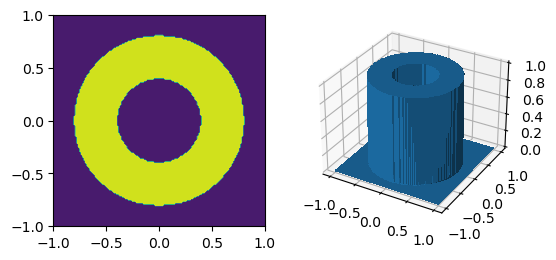

In [33]:
x , y = linspace(-1,1,150) , linspace(-1,1,150)
XX,YY = meshgrid(x,y)
psi_ini = cond_ini_dona(x,y)

figura = figure(dpi=100)
ejes = figura.add_subplot(1,2,1)
ejes.set_aspect('equal')
contourf(XX,YY,psi_ini)
ejes = figura.add_subplot(1,2,2,projection='3d')
ejes.plot_surface(XX,YY,psi_ini,rstride=1,
                  cstride=1,lw=0,antialiased=False)

show()

In [63]:
def AiB_2D(Nx_in,Ny_in,r):
    # dim no considera los puntos a la frontera
    A , B = zeros((Nx_in*Ny_in,Nx_in*Ny_in)) , zeros((Nx_in*Ny_in,Nx_in*Ny_in))
    for i in range(Nx_in):
        for j in range(Ny_in):
            A[i*Ny_in+j,i*Ny_in+j] = 1+4*r
            B[i*Ny_in+j,i*Ny_in+j] = 1-4*r
    # Diagonal superior en j
    for i in range(Nx_in):
        for j in range(Ny_in-1):
            A[i*Ny_in+j+1,i*Ny_in+j] = -r
            A[i*Ny_in+j,i*Ny_in+j+1] = -r
            B[i*Ny_in+j+1,i*Ny_in+j] = r
            B[i*Ny_in+j,i*Ny_in+j+1] = r
    # Diagonal superior en i
    for i in range(Nx_in-1):
        for j in range(Ny_in):
            A[(i+1)*Ny_in+j,i*Ny_in+j] = -r
            A[i*Ny_in+j,(i+1)*Ny_in+j] = -r
            B[(i+1)*Ny_in+j,i*Ny_in+j] = r
            B[i*Ny_in+j,(i+1)*Ny_in+j] = r
    return A , B

In [64]:
AiB_2D(3,3,1)

(array([[ 5., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  5., -1.,  0., -1.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  5.,  0.,  0., -1.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  5., -1.,  0., -1.,  0.,  0.],
        [ 0., -1.,  0., -1.,  5., -1.,  0., -1.,  0.],
        [ 0.,  0., -1.,  0., -1.,  5.,  0.,  0., -1.],
        [ 0.,  0.,  0., -1.,  0.,  0.,  5., -1.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0., -1.,  5., -1.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  5.]]),
 array([[-3.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 1., -3.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -3.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  0., -3.,  1.,  0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  1., -3.,  1.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.,  1., -3.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.,  0.,  0., -3.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  1., -3.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., -3.]]))